In [1]:
import os
import librosa, librosa.display
import matplotlib.pyplot as plt
import math

Processing normal
Processing wheezes
Processing pleuralrub
Processing crackle
Processing stridor


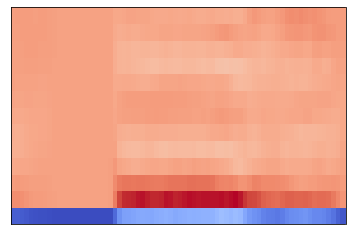

In [3]:
for root, folders, files in os.walk('/content/drive/MyDrive/Python Project/sound'):
        # going into sound folder in drive
    for folder in folders:
        os.makedirs(f'/content/img_data/{folder}',0o666)     #creating folder
        print(f'Processing {folder}')   #prefix f is for formatting
        for _root, _folders, _files in os.walk(f'/content/drive/MyDrive/Python Project/sound/{folder}'):
                #going into every folders of sound
            for file in _files:
                  #going into every files of the folders in sound
                signal, sr = librosa.load(f'/content/drive/MyDrive/Python Project/sound/{folder}/{file}', sr=22050)
                size = signal.shape[0]
                start = 0
                end = start + (size//5) #dividing the sound into 5 parts for more accuracy
                for i in range(5):
                    part_of_signal = signal[start:end]
                    mfcc = librosa.feature.mfcc(part_of_signal,
                                n_fft=2048,
                                hop_length=512,
                                n_mfcc=13)
                    librosa.display.specshow(mfcc, sr=sr, hop_length=512)
                    plt.savefig(f'/content/img_data/{folder}/{file[:-4] +"_"+ str(i)}.png')
                    start = end
                    end = start + (size//5)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_set = ImageDataGenerator(rescale=1./255)
test_set = ImageDataGenerator(rescale=1./255)

In [ ]:
! pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('img_data', output="out", seed=1337, ratio=(.9, .1))

In [ ]:
training_data = training_set.flow_from_directory(
        '/content/out/train',
        batch_size=1,
        target_size=(128, 128))

val_data = test_set.flow_from_directory(
        '/content/out/val',
        batch_size=1,
        target_size=(128, 128))

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(3e-4),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
log_dir = "logs/fit/" + "MODEL_14"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(training_data,
          validation_data=val_data,epochs=50,
          callbacks=[tensorboard_callback])

In [ ]:
model.evaluate(val_data)

In [ ]:
things = model.predict(val_data)

In [ ]:
import numpy as np

In [ ]:
pred = np.argmax(things,axis=1)
val_data.class_indices
classes = { j:i for i,j in val_data.class_indices.items()}


In [ ]:
import pandas as pd

In [ ]:
things = pd.DataFrame({'FILES':val_data.filenames,'PRED':[classes[x] for x in pred]})
things
# ! rm -r img_data/.ipynb_checkpoints

In [ ]:
from tensorflow.keras.models import load_model
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from collections import Counter

In [ ]:
model.save('MODEL.h5')

In [ ]:
from tensorflow.keras.models import load_model
import librosa
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import librosa.display
import math
class find_ans :
  def __init__(self,model_name):
    self.model = load_model(model_name)
    self.dic = {0:"crackle",1:"normal",2:"pleuralrub",3:"stridor",4:"wheezes"}  
  def audio_to_spec(self,aud) :
    signal, sr = librosa.load(aud, sr=22050)
    size = signal.shape[0]
    start = 0
    end = start + math.floor(size/5)
    for i in range(5):
        part_of_signal = signal[start:end]
        mfcc = librosa.feature.mfcc(part_of_signal,
                    n_fft=2048,
                    hop_length=512,
                    n_mfcc=13)
        librosa.display.specshow(mfcc, sr=sr, hop_length=512)
        plt.savefig(f"test_img_{i}.png")
        plt.axis('off')
        plt.clf()
        start = end
        end = start + math.floor(size/5)
  def predict(self,aud):
    self.audio_to_spec(aud)
    results = []
    for i in range(5):
      matrix = image.load_img(f"test_img_{i}.png",target_size=(128,128))
      matrix = image.img_to_array(matrix) 
      pred = self._predict(matrix)
      results.append(pred)
      from collections import Counter
      return Counter(results).most_common()[0][0]
    return results
  def _predict(self,specgram):
    specgram = specgram/255.0
    specgram = specgram.reshape(1,specgram.shape[0],specgram.shape[1],specgram.shape[2])
    prediction = self.model.predict(specgram)
    prediction = np.argmax(prediction)
    return self.dic[prediction]

In [ ]:
obj = find_ans("/content/drive/MyDrive/Python Project/real.h5")
obj.predict('/content/drive/MyDrive/Python Project/sound/stridor/ab s1.wav')